### **Business Understanding**

I am analyzing the AirBnB data set for Seattle listings


I am looking at the the reviews and listing csv files


Some questions I want to answer include the following:


1. What are the most expensive neighborhoods in Seattle
2. Which factors are strongly correlated with each other?
3. What are the average review scores
4. What factors affect pricing the most for properties. (Build a model)

**Data Understanding**

I am looking at the listings.csv file.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
listing_df = pd.read_csv("listings.csv")

In [2]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Data Types and Basic Description

In [3]:
listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [4]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
list_of_listing_columns = listing_df.columns.tolist()

Counting the number of NaNs in the columns

In [6]:
listings_with_nans = list()
for listing_column in list_of_listing_columns:
    nan_count = listing_df[listing_column].isna().sum()
    if nan_count > 0:
        listings_with_nans.append(listing_column)

In [7]:
listings_with_nans

['summary',
 'space',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

Visualizing the frequency of some of the  categorical variables

In [8]:
categorical_variables_to_display_frequency = ["neighbourhood_group_cleansed","room_type","property_type"]

In [9]:
listing_df["neighbourhood"].value_counts()

Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
Pike Market             2
South Park              2
North College Park      1
Fairmount Park          1
Roxhill                 1
Name: neighbourhood, Length: 81, dtype: int64

Variable: neighbourhood_group_cleansed


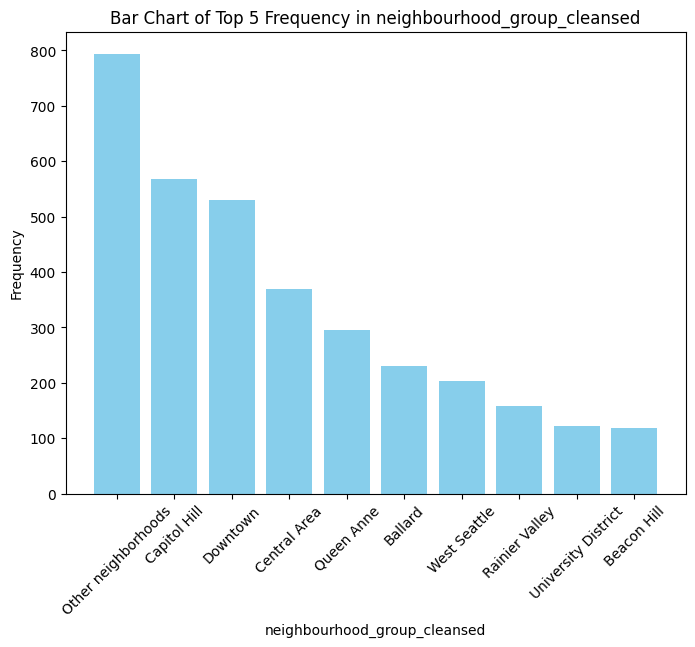

Variable: room_type


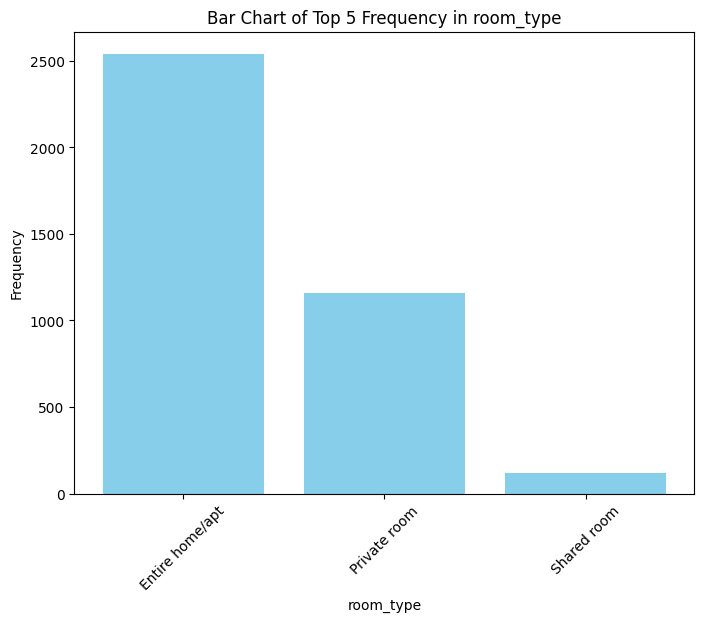

Variable: property_type


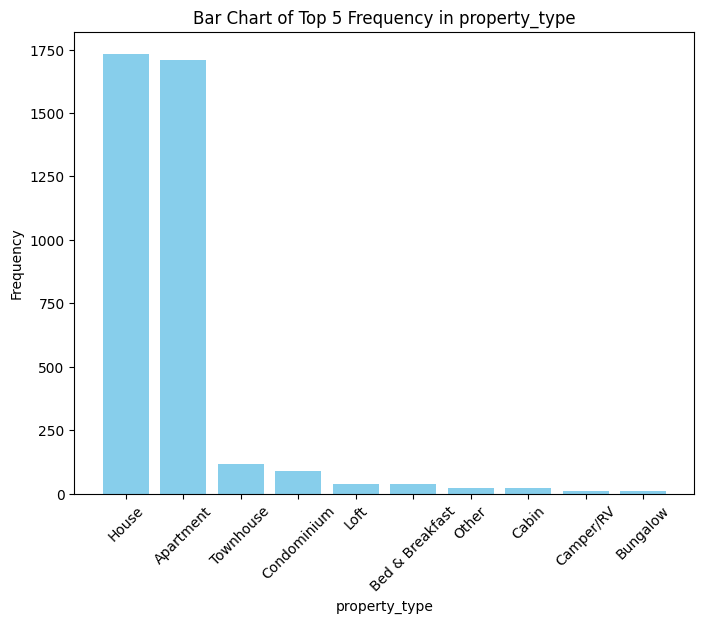

In [10]:
for variable in categorical_variables_to_display_frequency:
    print("Variable: " + variable)
    
    # Count the occurrences of each value in the variable
    value_counts = listing_df[variable].value_counts().head(10)  # Select top 10 values
    
    # Plotting the bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values, color='skyblue')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('Bar Chart of Top 5 Frequency in ' + variable)
    plt.xticks(rotation=45)
    plt.show()

**Data Preparation**

Keeping relevant values only for my analysis

In [11]:
relevant_columns = [
    'neighbourhood_group_cleansed', 'price', 'review_scores_rating',
    'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
]

In [12]:
updated_listing_df = listing_df[relevant_columns]

Evaluating and dealing with NaNs after getting rid of irrelevant columns

In [13]:
updated_listing_columns = updated_listing_df.columns.tolist()

In [14]:
updated_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  3818 non-null   object 
 1   price                         3818 non-null   object 
 2   review_scores_rating          3171 non-null   float64
 3   property_type                 3817 non-null   object 
 4   room_type                     3818 non-null   object 
 5   accommodates                  3818 non-null   int64  
 6   bathrooms                     3802 non-null   float64
 7   bedrooms                      3812 non-null   float64
 8   beds                          3817 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 268.6+ KB


The columns with nan values are review_scores_rating, property_type, bathrooms, bedrooms, and bed. I am going to drop the values with nans

In [15]:
 updated_listing_df = updated_listing_df.dropna() 

Converting the price column to float

In [16]:
updated_listing_df['price'] = updated_listing_df['price'].str.replace(',', '').str.replace('$', '').astype(float)

/var/folders/1_/d9l2qj0926j1w_57cv7g62hw0000gn/T/ipykernel_2984/246905792.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  updated_listing_df['price'] = updated_listing_df['price'].str.replace(',', '').str.replace('$', '').astype(float)


In [17]:
updated_listing_df['room_type'].value_counts()

Entire home/apt    2112
Private room        949
Shared room          92
Name: room_type, dtype: int64

## Evaluation

**Evaluating and Answering the Questions that I proposed**

What are the most expensive neighborhoods in Seattle?

In [18]:
updated_listing_df['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    655
Capitol Hill           456
Downtown               449
Central Area           319
Queen Anne             246
Ballard                193
West Seattle           161
Rainier Valley         133
Beacon Hill            102
University District     96
Delridge                65
Cascade                 65
Northgate               62
Lake City               56
Magnolia                47
Seward Park             39
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

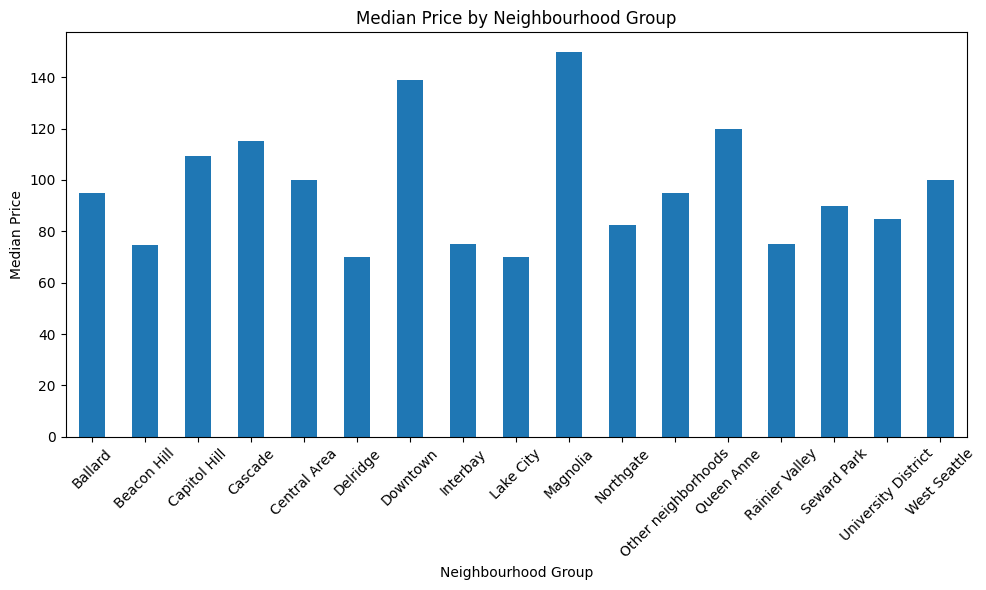

In [19]:
#updated_listing_df.groupby('neighbourhood_group_cleansed')['price'].median().plot.bar()


median_prices = updated_listing_df.groupby('neighbourhood_group_cleansed')['price'].median()

# Create a bar plot
median_prices.plot.bar(figsize=(10, 6))
plt.xlabel('Neighbourhood Group')
plt.ylabel('Median Price')  # Adding y-label
plt.title('Median Price by Neighbourhood Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [20]:
updated_listing_df.groupby('neighbourhood_group_cleansed')['price'].median().sort_values(ascending=False)

neighbourhood_group_cleansed
Magnolia               150.0
Downtown               139.0
Queen Anne             120.0
Cascade                115.0
Capitol Hill           109.5
West Seattle           100.0
Central Area           100.0
Other neighborhoods     95.0
Ballard                 95.0
Seward Park             90.0
University District     85.0
Northgate               82.5
Interbay                75.0
Rainier Valley          75.0
Beacon Hill             74.5
Delridge                70.0
Lake City               70.0
Name: price, dtype: float64

From this graph, we can tell that the AirBnBs have the highest median price in the Magnolia neighborhood in Seattle followed by Downtown

Which attributes of a AirBnB listing correlate highly which each other.

/var/folders/1_/d9l2qj0926j1w_57cv7g62hw0000gn/T/ipykernel_2984/1561662050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(updated_listing_df.corr(), annot=True)


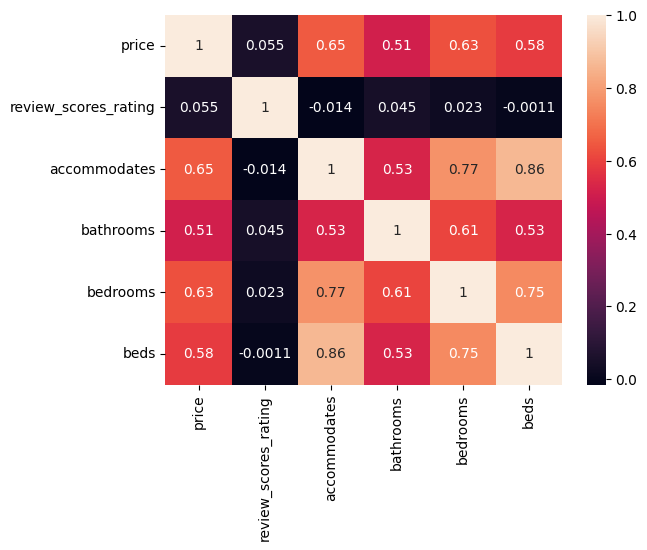

In [21]:
ax = sns.heatmap(updated_listing_df.corr(), annot=True)

From this plot, we can tell that:
1.  the number of beds and the number of people accommated are highly correlated with each other, 
2. the number of bedrooms and people accomoated are highly correlated
3.  Number of bedrooms and price have a strong correlation
4. The number of bedrooms and beds are strongly correlated

Median Cleanliness Rating by Neighborhood in Seattle

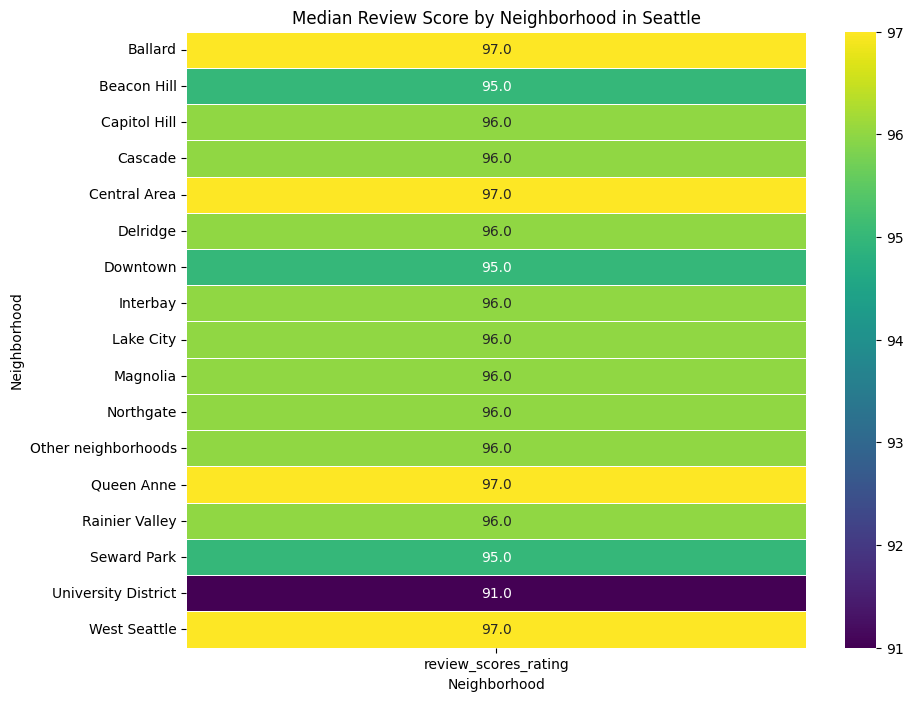

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'updated_listing_df' with relevant data

# Calculate average review score by neighborhood
avg_review_score_by_neighborhood = updated_listing_df.groupby('neighbourhood_group_cleansed')['review_scores_rating'].median().reset_index()

# Pivot the data for heatmap using pivot_table
heatmap_data = avg_review_score_by_neighborhood.pivot_table(index='neighbourhood_group_cleansed', values='review_scores_rating')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Median Review Score by Neighborhood in Seattle')
plt.xlabel('Neighborhood')
plt.ylabel('Neighborhood')
plt.show()


From this we can see that Central Area had the highest review score rating, while University District has the lowest

What attributes affect AirBnb Pricing the most? 

I am going to build a linear model to determine what qualities/features affect pricing the most

In [23]:
categorical_variables_to_encode = ['neighbourhood_group_cleansed', 'room_type', 'property_type']


In [24]:
one_hot_encoded_data = pd.get_dummies(updated_listing_df, columns = categorical_variables_to_encode)

In [25]:
X = one_hot_encoded_data.drop(['price','review_scores_rating'],axis=1)
y = one_hot_encoded_data['price']

In [26]:
X

,accommodates,bathrooms,bedrooms,beds,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,...,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,4,1.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,4.5,5.0,7.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6,2.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,2,1.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,5,1.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3811,3,1.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3812,4,1.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3813,6,2.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test data
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model and fit it to the scaled training data
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

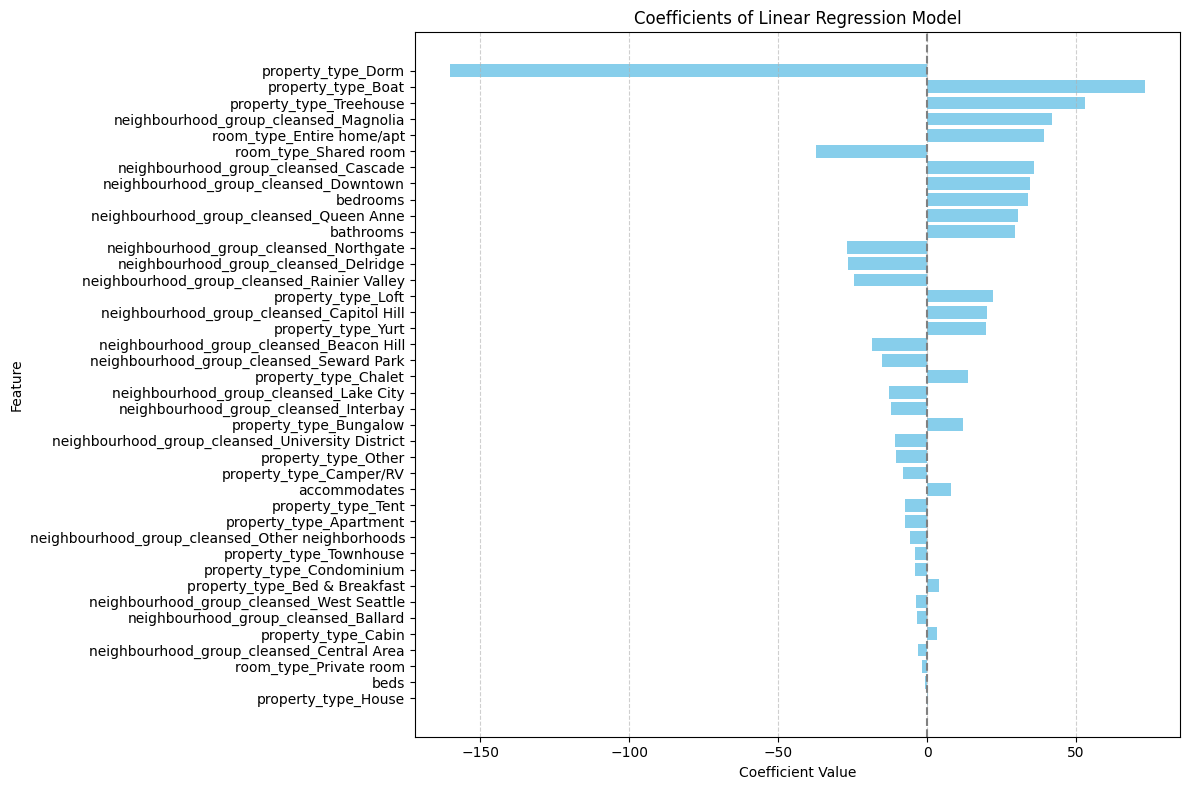

In [29]:
features = X.columns
coefficients = model.coef_

# Sort coefficients by absolute value for better visualization
coefficients_sorted = sorted(zip(features, coefficients), key=lambda X: abs(X[1]), reverse=True)
features_sorted, coefficients_sorted = zip(*coefficients_sorted)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(features_sorted, coefficients_sorted, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Linear Regression Model')
plt.axvline(x=0, color='gray', linestyle='--') 
plt.grid(axis='x', linestyle='--', alpha=0.6)  
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

For example from this graph, We can see that the Dorm type property greatly decreases price, while the boat type property increases the price drastically.  